In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib notebook
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

In [2]:
def eulerAnglesToRotationMatrix(theta):
    R_x = np.array([[1, 0, 0],
                    [0, math.cos(theta[0]), -math.sin(theta[0])],
                    [0, math.sin(theta[0]), math.cos(theta[0])]
                    ])

    R_y = np.array([[math.cos(theta[1]), 0, math.sin(theta[1])],
                    [0, 1, 0],
                    [-math.sin(theta[1]), 0, math.cos(theta[1])]
                    ])

    R_z = np.array([[math.cos(theta[2]), -math.sin(theta[2]), 0],
                    [math.sin(theta[2]), math.cos(theta[2]), 0],
                    [0, 0, 1]
                    ])

    R = np.dot(R_z, np.dot(R_y, R_x))

    return R

def gradtorad(listx) :
    listy = [0,0,0]
    listy[0] = (listx[0]/180)*math.pi
    listy[1] = (listx[1] / 180) * math.pi
    listy[2] = (listx[2] / 180) * math.pi
    return listy

def radtograd(listx) :
    listy = [0,0,0]
    listy[0] = (listx[0]/math.pi)*180
    listy[1] = (listx[1]/math.pi)*180
    listy[2] = (listx[2]/math.pi)*180
    return listy

def DrawPlot(Start, End, EndToEnd, EndL, EndToEndL):
    plt.clf()
    ax = fig.add_subplot(111, projection='3d')
    
    # Right side
    ax.plot([Start[0],End[0]],[Start[1],End[1]],[Start[2],End[2]],c='r')
    ax.plot([End[0], EndToEnd[0]],[End[1], EndToEnd[1]],[End[2], EndToEnd[2]],c='r')
    
    # left side
    ax.plot([Start[0],EndL[0]],[Start[1],EndL[1]],[Start[2],EndL[2]],c='r')
    ax.plot([EndL[0], EndToEndL[0]],[EndL[1], EndToEndL[1]],[EndL[2], EndToEndL[2]],c='r')
    
    ax.set_zlim(-7,7)
    ax.set_ylim(-7,7)
    ax.set_xlim(-7,7)
#     plt.show()
    return ax

def CalculateLength(Point1, Point2):
    # Point2 & Point2 are lists, filled like: [x,y,z]
    # https://math.stackexchange.com/questions/42640/calculate-distance-in-3d-space
    XLength = abs(Point1[0] - Point2[0])
    YLength = abs(Point1[1] - Point2[1])
    ZLength = abs(Point1[2] - Point2[2])
    Distance = math.sqrt((XLength ** 2) + (YLength ** 2) + (ZLength ** 2))
    return Distance

def CreateEndPoint(StartPoint, length, Rotations):
    # startPoint must be a np.array
    # Length must be number
    # Rotations must be list of euler angels
    Rotations_rad = gradtorad(Rotations) #Convert to radians
    Matrix = eulerAnglesToRotationMatrix(Rotations_rad) # create a rotation matrix of rotations
    
    # Create endpoint of vector pointing forward (Thorax sensor)
    tmpEndPoint = StartPoint + np.array([0,length,0])
    
    # Transform vector
    EndPoint = np.dot(Matrix, tmpEndPoint)
    return EndPoint
    

# def MatrixXVector(matrix, vector):

In [5]:
df_cleaned = pd.read_csv('../EH1_cleaned.csv', header=None)

df_cleaned = df_cleaned.rename(columns={0: "thorax_r_x", 1: "thorax_r_y", 2: "thorax_r_z"})
df_cleaned = df_cleaned.rename(columns={3: "clavicula_r_x", 4: "clavicula_r_y", 5: "clavicula_r_z"})
df_cleaned = df_cleaned.rename(columns={6: "scapula_r_x", 7: "scapula_r_y", 8: "scapula_r_z"})
df_cleaned = df_cleaned.rename(columns={9: "humerus_r_x", 10: "humerus_r_y", 11: "humerus_r_z"})
df_cleaned = df_cleaned.rename(columns={12: "ellebooghoek_r"})
df_cleaned = df_cleaned.rename(columns={15: "thorax_l_x", 16: "thorax_l_y", 17: "thorax_l_z"})
df_cleaned = df_cleaned.rename(columns={18: "clavicula_l_x", 19: "clavicula_l_y", 20: "clavicula_l_z"})
df_cleaned = df_cleaned.rename(columns={21: "scapula_l_x", 22: "scapula_l_y", 23: "scapula_l_z"})
df_cleaned = df_cleaned.rename(columns={24: "humerus_l_x", 25: "humerus_l_y", 26: "humerus_l_z"})
df_cleaned = df_cleaned.rename(columns={27: "ellebooghoek_l"})

In [6]:
Data = df_cleaned[['clavicula_r_x','clavicula_r_z','clavicula_r_y']]
Data2 = df_cleaned[["humerus_r_x", "humerus_r_z", "humerus_r_y"]]


DataL = df_cleaned[['clavicula_l_x','clavicula_l_z','clavicula_l_y']]
DataL2 = df_cleaned[["humerus_l_x", "humerus_l_z", "humerus_l_y"]]

198


Traceback (most recent call last):
  File "/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/animation.py", line 999, in _start
    self._init_draw()
  File "/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "/opt/jupyterhub/anaconda/lib/python3.6/site-packages/matplotlib/animation.py", line 1768, in _draw_frame
    key=lambda x: x.get_zorder())
TypeError: 'Axes3DSubplot' object is not iterable


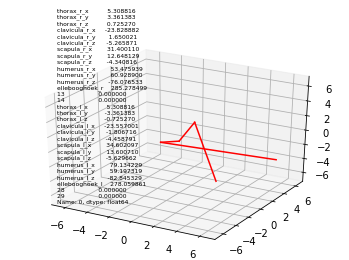

In [7]:
def update_lines(num):
    BorstBeenStart = np.array([0,0,0])
    ClaviculaFrame = Data.iloc[num].tolist()
    ClaviculaEnd = CreateEndPoint(BorstBeenStart, -3, ClaviculaFrame)

    HumerusFrame = Data2.iloc[num].tolist()
    HumerusEnd = CreateEndPoint(ClaviculaEnd, -5, HumerusFrame)


    # Left side
    LeftMutiply = np.array([1,-1,1])

    ClaviculaLFrame = DataL.iloc[num].tolist()
    ClaviculaLEnd = CreateEndPoint(BorstBeenStart, -3, ClaviculaLFrame)

    HumerusLFrame = DataL2.iloc[num].tolist()
    HumerusLEnd = CreateEndPoint(ClaviculaLEnd, -5, HumerusLFrame) 



    # print('StartPoint: %s \t EndPoint: %s' % (startingpoint, EndPoint))
    # print('Rotation: %s' % Rotations)
    # print('Rotation: %s' % Rotations2)
    # print('Lengte: %s'%CalculateLength(startingpoint, EndPoint))
    ax = DrawPlot(BorstBeenStart, ClaviculaEnd, HumerusEnd, ClaviculaLEnd* LeftMutiply, HumerusLEnd* LeftMutiply)
    ax.text(-7, -7, -7,  '%s' % df_cleaned.iloc[num], size=6, zorder=1, color='k')
    
    return ax

fig = plt.figure()
ax = update_lines(0)
frames = len(df_cleaned)
print(frames)
line_ani = animation.FuncAnimation(fig, update_lines, frames,
                                   interval=121, blit=True)
plt.show()

In [8]:
Data

,clavicula_r_x,clavicula_r_z,clavicula_r_y
0,-23.828882,-5.265871,1.650021
1,-24.010384,-5.260640,1.503525
2,-23.995977,-5.261056,1.513071
3,-24.039960,-5.259846,2.001698
4,-24.497513,-5.246420,2.160091
5,-24.611306,-5.242923,2.022734
6,-24.684683,-4.228125,2.024849
7,-24.264638,-5.232695,2.187310
8,-24.420415,-4.834970,2.315333
9,-24.178297,-4.947528,2.302826
